C:\Users\shali\AppData\Local\Temp\ipykernel_14528\3187528235.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   customer_id  gender  age  tenure  balance  products_number  \
0            1  Female   37       3  82499.0                3   
1            2  Female   21       1  95444.1                3   
2            3    Male   38       1  99737.2                4   
3            4    Male   52       3  31333.5                3   
4            5    Male   41       1  99491.5                3   

   has_credit_card  is_active_member  estimated_salary  churn  
0                0                 0           39730.9      1  
1                1                 1           91994.0      0  
2                0                 0          103673.0      0  
3                1                 0          133584.0      0  
4                1                 0           70588.8      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       500

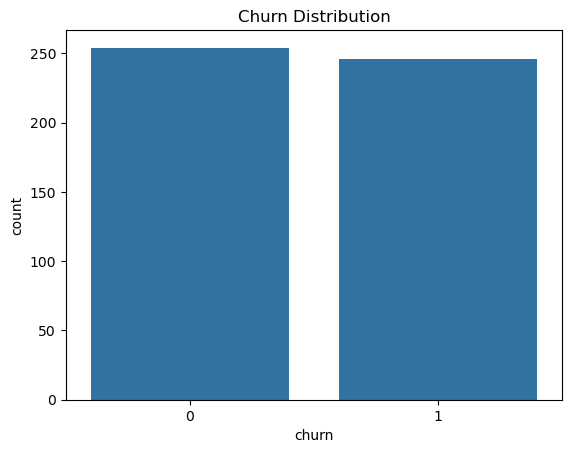

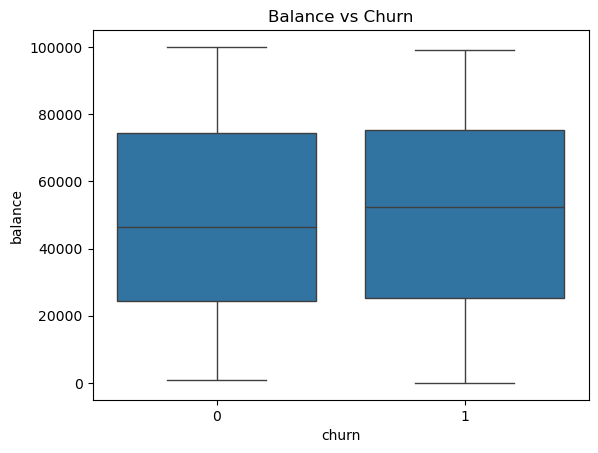

              precision    recall  f1-score   support

           0       0.64      0.38      0.47        61
           1       0.41      0.67      0.50        39

    accuracy                           0.49       100
   macro avg       0.52      0.52      0.49       100
weighted avg       0.55      0.49      0.49       100

[[23 38]
 [13 26]]
✅ Model saved as model.pkl


In [2]:
# churn_analysis.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# -------------------
# 1. Connect to MySQL
# -------------------
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="churn_db"
)

query = "SELECT * FROM customers;"
df = pd.read_sql(query, conn)
conn.close()

print(df.head())
print(df.info())

# -------------------
# 2. Data Cleaning
# -------------------
df.dropna(inplace=True)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# -------------------
# 3. EDA
# -------------------
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

sns.boxplot(x='churn', y='balance', data=df)
plt.title("Balance vs Churn")
plt.show()

# -------------------
# 4. Feature Engineering
# -------------------
X = df[['gender', 'age', 'tenure', 'balance', 'products_number', 'has_credit_card', 'is_active_member', 'estimated_salary']]
y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------
# 5. Train Model
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# -------------------
# 6. Evaluate
# -------------------
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# -------------------
# 7. Save Model
# -------------------
with open("model.pkl", "wb") as f:
    pickle.dump((model, scaler), f)

print("✅ Model saved as model.pkl")
